## Exploratory Data Analysis for Baseball Database

The main purpose is to gain an overview of the dataset. Identify problems in the dataset that need to be corrected. Identify outliers and consider if these are real or erros in the dataset.

The exploratory data analysis (EDA) process will help firm up which dependent variables should be used to investigate independent variables and how the former depends on the latter.

The theme of this investigation is to ask if geographical location has an affect, if where a person was born, where the college was located has an impact on a dependent variable (e.g. Salary of player).

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ballbase import figures

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
import Baseball_data_investigation
df = Baseball_data_investigation.main()
df.head()

Processed hall of fame data
There are 250 members of the Hall of Fame

Processed All Star data
aaronha01    25
mayswi01     24
musiast01    24
mantlmi01    20
ripkeca01    19
Name: allstar_count, dtype: int64

Processed Player Awards data
bondsba01    47
willite01    39
dimagjo01    36
musiast01    34
ruthba01     33
Name: award_count, dtype: int64

Processed Salary data
            mean_salary  max_salary  min_salary  \
playerID                                          
aardsda01  1.322821e+06   4500000.0    300000.0   
aasedo01   5.750000e+05    675000.0    400000.0   
abadan01   3.270000e+05    327000.0    327000.0   
abadfe01   7.532800e+05   1250000.0    418000.0   
abbotje01  2.462500e+05    300000.0    175000.0   

           mean_salary_standardized_annually  \
playerID                                       
aardsda01                          -0.440097   
aasedo01                            0.299314   
abadan01                           -0.663649   
abadfe01                    

C:\Users\Adam\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\Adam\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:43: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  union = _union_indexes(indexes)


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,allstar_count,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,cobbty01,1936.0,BBWAA,226.0,170.0,222.0,Y,Player,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,ruthba01,1936.0,BBWAA,226.0,170.0,215.0,Y,Player,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,wagneho01,1936.0,BBWAA,226.0,170.0,215.0,Y,Player,NaN,NaN,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,mathech01,1936.0,BBWAA,226.0,170.0,205.0,Y,Player,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,johnswa01,1936.0,BBWAA,226.0,170.0,189.0,Y,Player,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [7]:
df.isnull().values.any()

True

### Univariate exploratory data analysis

count    18973.000000
mean      1931.435356
std         41.555514
min       1820.000000
25%       1895.000000
50%       1937.000000
75%       1969.000000
max       1996.000000
Name: birthYear, dtype: float64

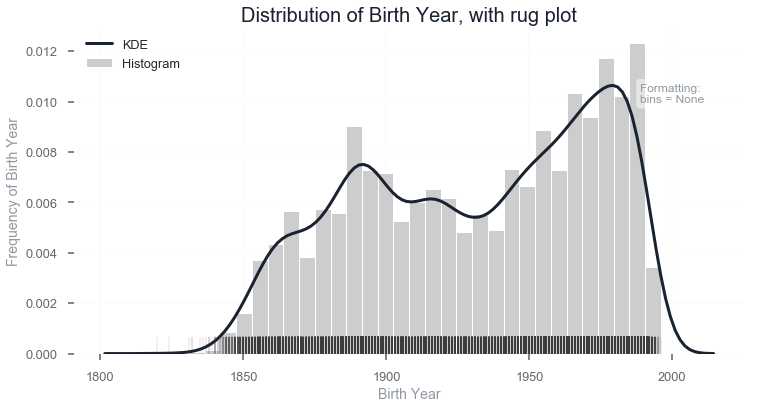

In [3]:
fig_7 = figures.univariate(df['birthYear'].dropna(), 'Birth Year', bin_n=None, formatting_right=False)
df['birthYear'].dropna().describe()

count    1343.000000
mean        4.585257
std         5.603915
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        47.000000
Name: award_count, dtype: float64

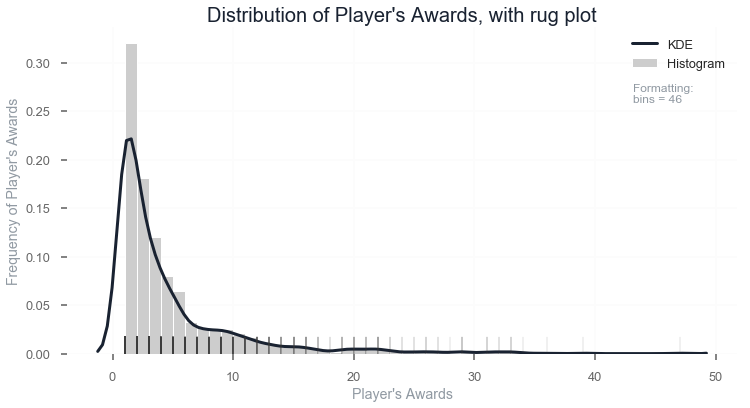

In [3]:
fig_1 = figures.univariate(df['award_count'].dropna(), 'Player\'s Awards')
df['award_count'].dropna().describe()

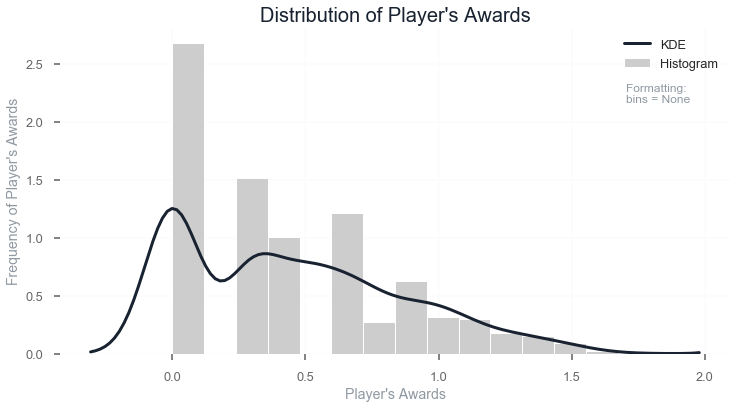

In [4]:
figures.univariate_overdispersed(df['award_count'].dropna(), 'Player\'s Awards', bin_n=None)

count    1774.000000
mean        2.901917
std         2.927680
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        25.000000
Name: allstar_count, dtype: float64

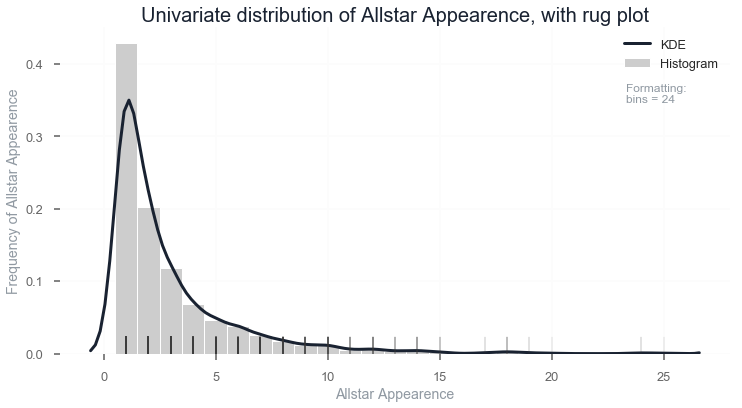

In [4]:
fig_2 = figures.univariate(df['allstar_count'].dropna(), 'Allstar Appearence')
df['allstar_count'].dropna().describe()

count    5155.000000
mean        0.054906
std         1.097218
min        -1.212567
25%        -0.644390
50%        -0.507863
75%         0.360500
max         7.489766
Name: max_salary_standardized_annually, dtype: float64

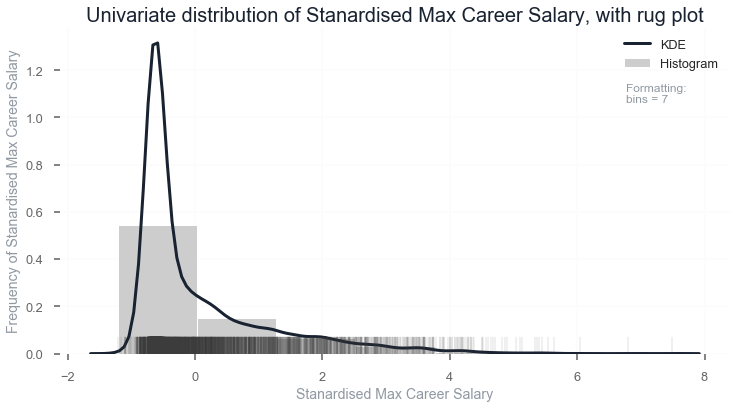

In [7]:
fig_3 = figures.univariate(df['max_salary_standardized_annually'].dropna(), 'Stanardised Max Career Salary', bin_n=None)
df['max_salary_standardized_annually'].dropna().describe()

count    5155.000000
mean       -0.650137
std         0.271276
min        -1.212567
25%        -0.712534
50%        -0.671235
75%        -0.644166
max         3.925495
Name: min_salary_standardized_annually, dtype: float64

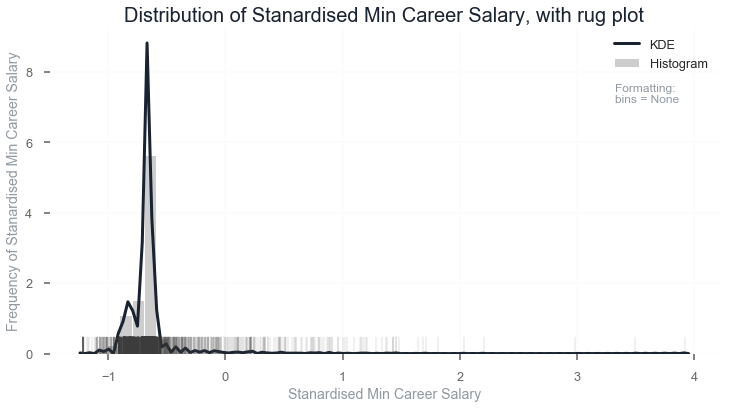

In [5]:
fig_4 = figures.univariate(df['min_salary_standardized_annually'].dropna(), 'Stanardised Min Career Salary', bin_n=None)
df['min_salary_standardized_annually'].dropna().describe()

count    5155.000000
mean       -0.319813
std         0.595574
min        -1.212567
25%        -0.656584
50%        -0.590689
75%        -0.223479
max         4.268085
Name: mean_salary_standardized_annually, dtype: float64

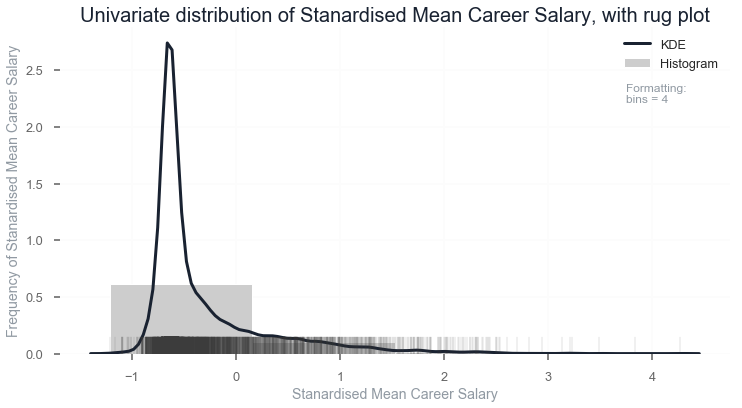

In [9]:
fig_5 = figures.univariate(df['mean_salary_standardized_annually'].dropna(), 'Stanardised Mean Career Salary', bin_n=None)
df['mean_salary_standardized_annually'].dropna().describe()

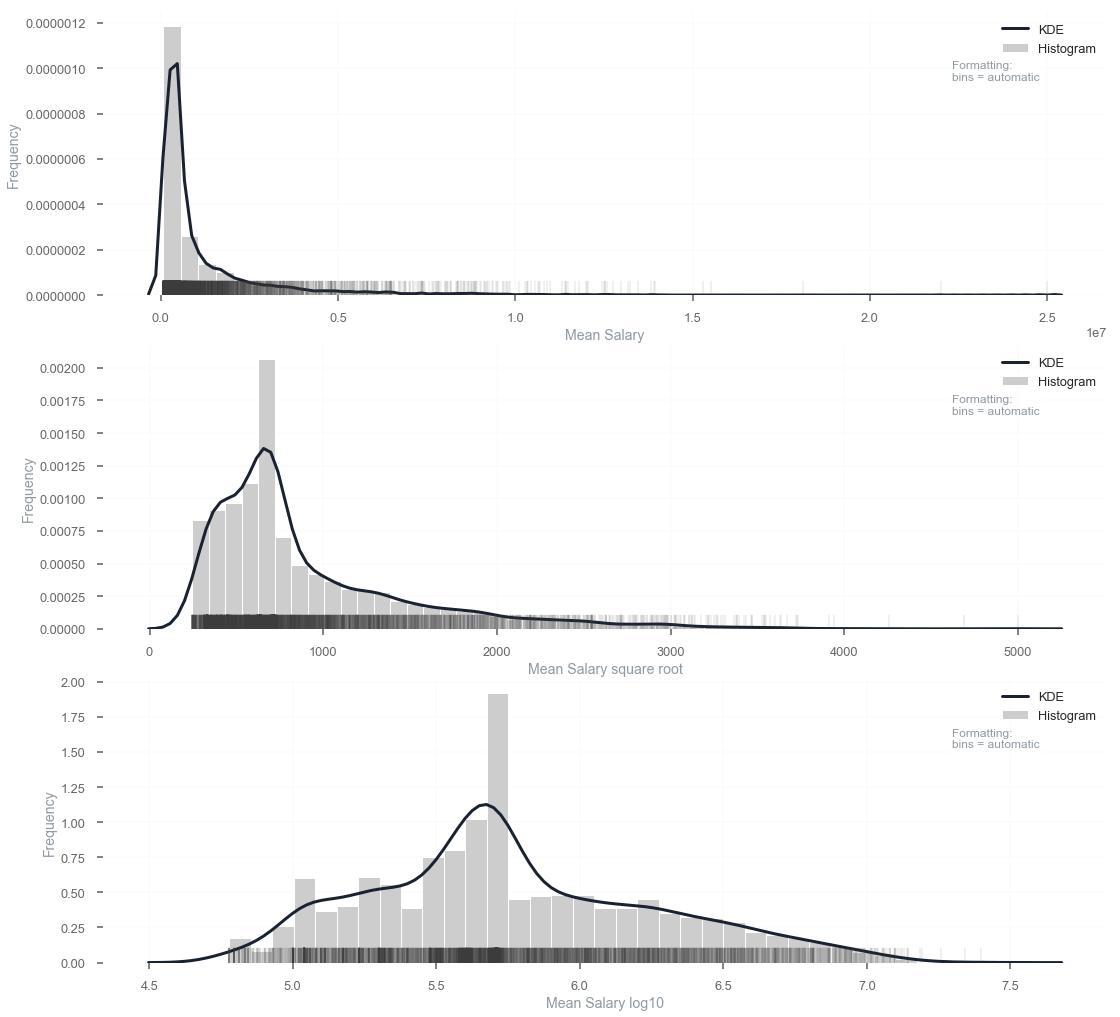

In [8]:
fig_a = figures.dist_transform_plot(df['mean_salary'].dropna(), 'Mean Salary', bin_n=None)

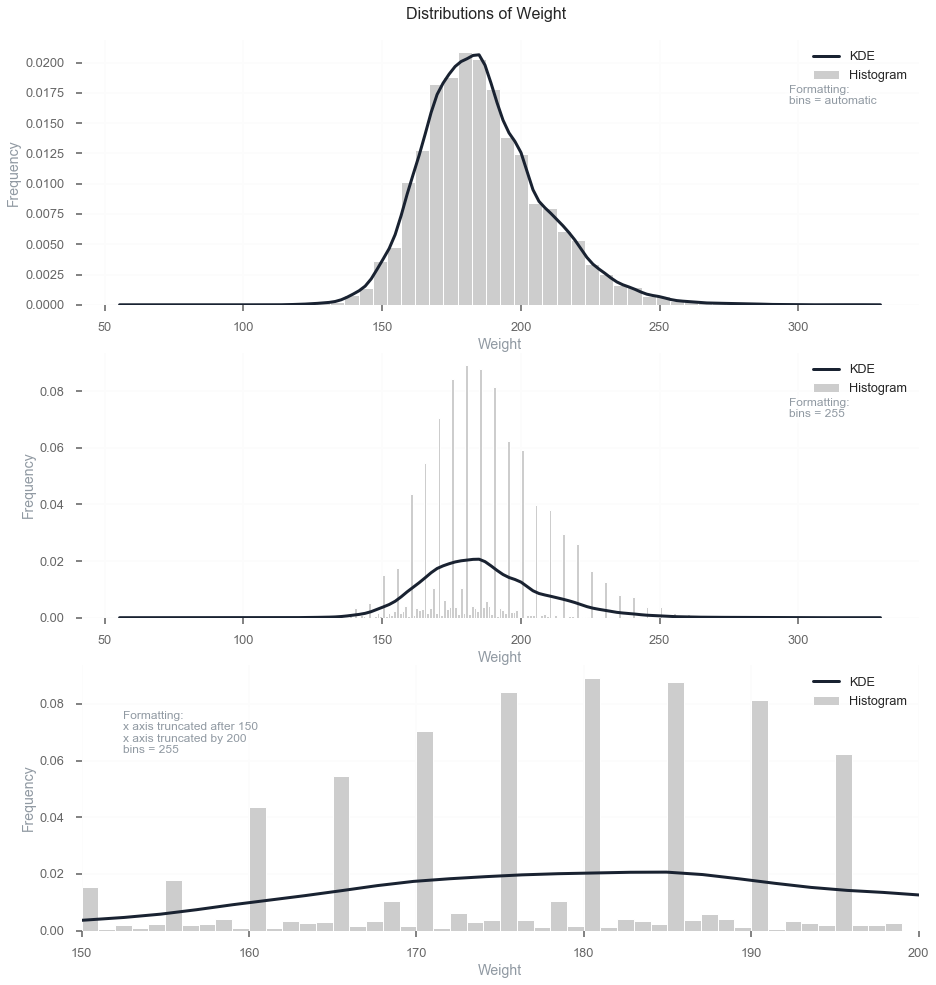

In [10]:
# Unable to turn this into a function at the moment
figsize = (15, 15)
# Needed to set up figure style
figures.common_set_up(figsize)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize)

fig.suptitle("Distributions of Weight", fontsize=16)
fig.subplots_adjust(hspace=0.18, top=0.95)

figures.univariate(df['weight'].dropna(), 'Weight', rug=False, bin_n=None, ax=ax1)
figures.univariate(df['weight'].dropna(), 'Weight', rug=False, ax=ax2)
figures.univariate(df['weight'].dropna(), 'Weight', rug=False, 
                   x_truncation_upper=200, x_truncation_lower=150, 
                   formatting_right=False, ax=ax3)

sns.despine(offset=2, trim=True, left=True, bottom=True)

count    18251.000000
mean       186.375596
std         21.524765
min         65.000000
25%        170.000000
50%        185.000000
75%        200.000000
max        320.000000
Name: weight, dtype: float64

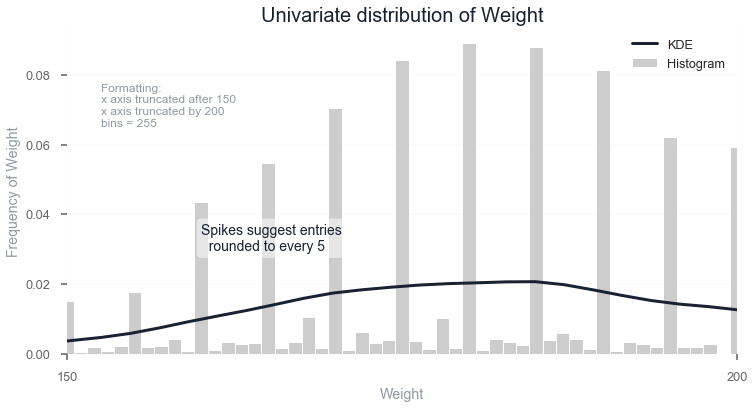

In [9]:
fig_8 = figures.univariate(df['weight'].dropna(), 'Weight', rug=False, x_truncation_upper=200, x_truncation_lower=150, formatting_right=False)

annot = "Spikes suggest entries\n  rounded to every 5"
fig_8 = figures.annotation_text(fig_8, annot, 0.4, 0.2, strong_colour=True, font_size=14)

df['weight'].dropna().describe()

count    18251.000000
mean       186.375596
std         21.524765
min         65.000000
25%        170.000000
50%        185.000000
75%        200.000000
max        320.000000
Name: weight, dtype: float64

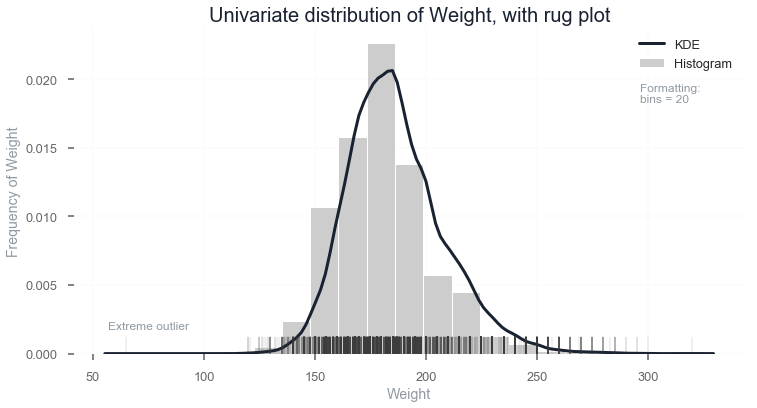

In [6]:
fig_8 = figures.univariate(df['weight'].dropna(), 'Weight', rug=True, bin_n= 20)

annot = "Extreme outlier"
fig_8 = figures.annotation_text(fig_8, annot, 0.1, 0.05, strong_colour=False, font_size=12)

df['weight'].dropna().describe()

count    18320.000000
mean        72.273799
std          2.603904
min         43.000000
25%         71.000000
50%         72.000000
75%         74.000000
max         83.000000
Name: height, dtype: float64

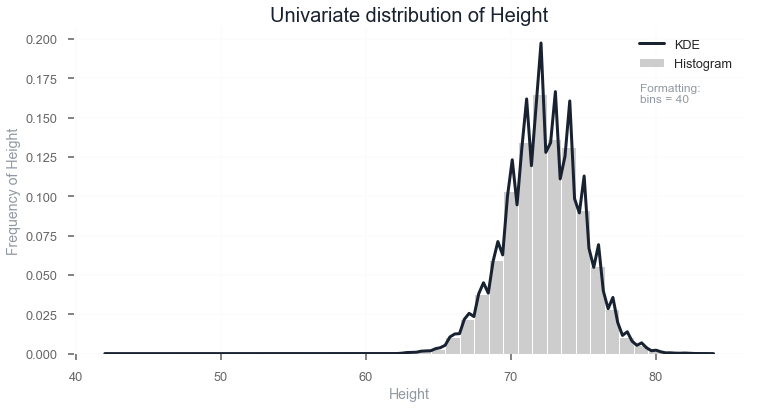

In [3]:
fig_9 = figures.univariate(df['height'].dropna(), 'Height', rug=False)
df['height'].dropna().describe()

## Bivariate distributions

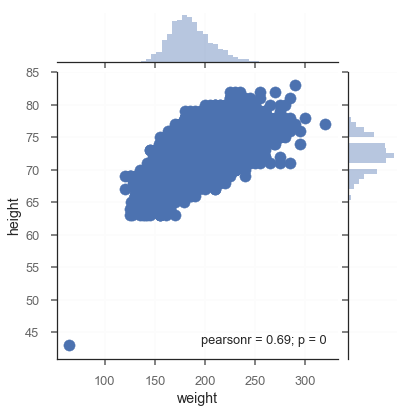

In [13]:
sns.jointplot(x=df['weight'].dropna(), y=df['height'].dropna())

### Binary plots

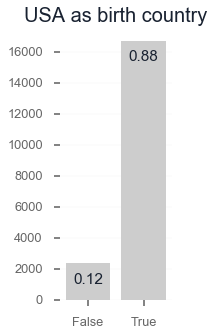

In [5]:
fig_c2 = figures.boolean_bar(df['birthCountry'].dropna()=='USA', 'USA as birth country')

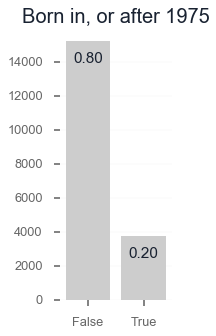

In [13]:
fig_c2 = figures.boolean_bar(df['birthYear'].dropna() >= 1975, 'Born in, or after 1975')

## Categorical data

In [14]:
columns = list(df.columns.values)
print(columns)

['playerID', 'yearid', 'votedBy', 'ballots', 'needed', 'votes', 'inducted', 'category', 'needed_note', 'allstar_count', 'award_count', 'mean_salary', 'max_salary', 'min_salary', 'mean_salary_standardized_annually', 'max_salary_standardized_annually', 'min_salary_standardized_annually', 'mode_schoolID', 'name_full', 'city', 'state', 'country', 'playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']


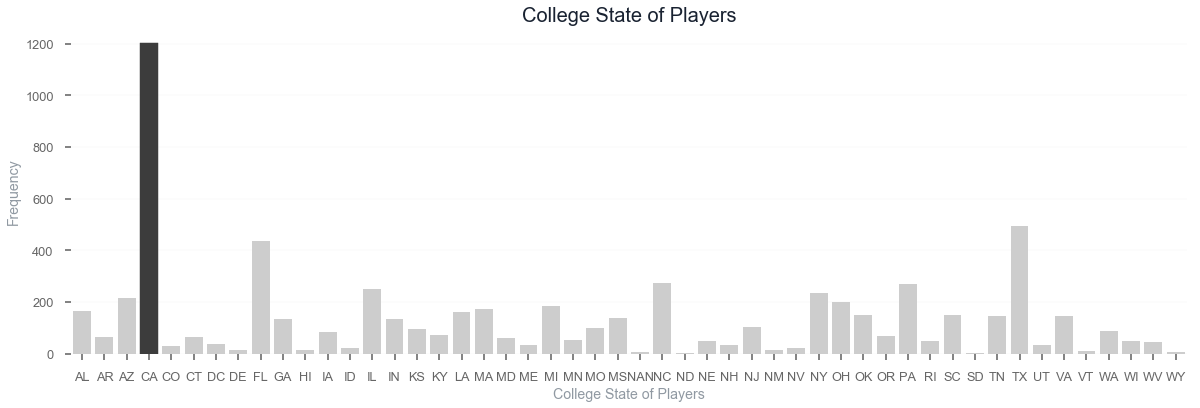

In [4]:
fig_c3 = figures.count_bar((df.sort_values(['state'])      # Sort by birthState
                           ['state']),                     # Display state of college
                           "College State of Players",
                            highlight=3);

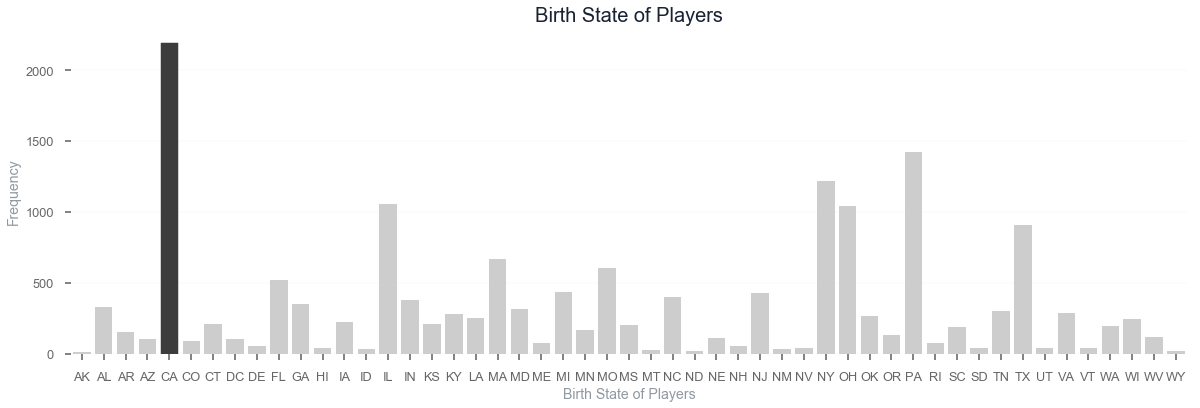

In [7]:
# df where birthCountry == USA, sort on birthState then display birthState
fig_c4 = figures.count_bar((
                            df[                              # From DataFrame
                                df['birthCountry'] == 'USA'  # Select only USA as birthCountry
                               ].sort_values(['birthState']) # Sort by birthState
                          ['birthState']),                   # Display birthState
                          'Birth State of Players',
                          highlight=4
                          );

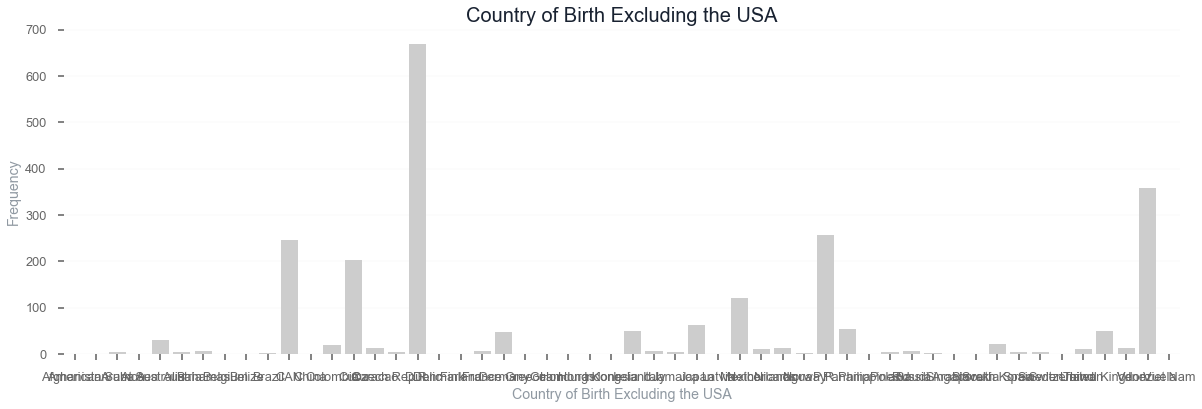

In [8]:
fig_c3 = figures.count_bar((
                            df[                                  # From DataFrame
                                df['birthCountry'] != 'USA'      # Select all that are not USA as birthCountry
                               ].sort_values(['birthCountry'])   # Sort by birthCountry
                            ['birthCountry']),                   # Display state of college
                           "Country of Birth Excluding the USA",
                            highlight=None);

In [20]:
series_x = df.sort_values(['state'])['state'].dropna()
series_y = df[df['birthCountry'] == 'USA'].sort_values(['birthState'])['birthState']

In [21]:
series_x

crawfev01    AL
freemhe01    AL
reynosh01    AL
vanegti01    AL
wingaer01    AL
bellhma01    AL
huntra01     AL
hunteto02    AL
hebsobr01    AL
valenjo04    AL
sherled01    AL
magadda01    AL
mordemi01    AL
rivermi02    AL
riversa01    AL
bakerja01    AL
roberda08    AL
kochal01     AL
mohrdu01     AL
robincl01    AL
oberrmi01    AL
gaineja01    AL
cunnito01    AL
hayesja02    AL
scottle01    AL
landrce01    AL
wardtu01     AL
balejo01     AL
jacksbo01    AL
hitchji01    AL
             ..
willile02    WV
fryjo01      WV
whitmda02    WV
freesge02    WV
freesge01    WV
pattesc01    WV
perkice01    WV
wellsed01    WV
fishewi01    WV
stoneto01    WV
alexabo01    WV
heiseji01    WV
gyorkje01    WV
smithbu01    WV
niekrjo01    WV
nippedu01    WV
woodsjo01    WV
searara01    WV
seabosc01    WV
hewitja01    WV
guthbu01     WV
hickmch01    WV
ashke01      WV
giebefl01    WV
goddajo01    WV
beltrri01    WY
brockgr01    WY
howear01     WY
fitzkpa01    WY
husonje01    WY
Name: state, Length: 657

In [22]:
series_y

803      AK
1176     AK
18486    AK
9488     AK
13538    AK
2837     AK
15360    AK
10205    AK
16788    AK
3817     AK
16379    AK
15352    AK
10028    AL
3506     AL
13288    AL
18387    AL
14804    AL
18383    AL
11956    AL
7332     AL
13286    AL
116      AL
1837     AL
2993     AL
7318     AL
7317     AL
4713     AL
16660    AL
5374     AL
1589     AL
         ..
7634     WV
3612     WV
5419     WV
11839    WV
11838    WV
18802    WV
2332     WV
775      WV
1229     WV
5716     WV
18485    WV
11072    WV
12425    WV
2359     WV
7156     WY
8349     WY
4701     WY
2142     WY
11066    WY
12587    WY
2071     WY
16334    WY
18449    WY
4119     WY
18000    WY
7971     WY
16221    WY
4304     WY
4971     WY
9628     WY
Name: birthState, Length: 16694, dtype: object

In [23]:
df_2 = pd.DataFrame([series_x, series_y])

In [2]:
df_2.groupby('state').count()

NameError: name 'df_2' is not defined

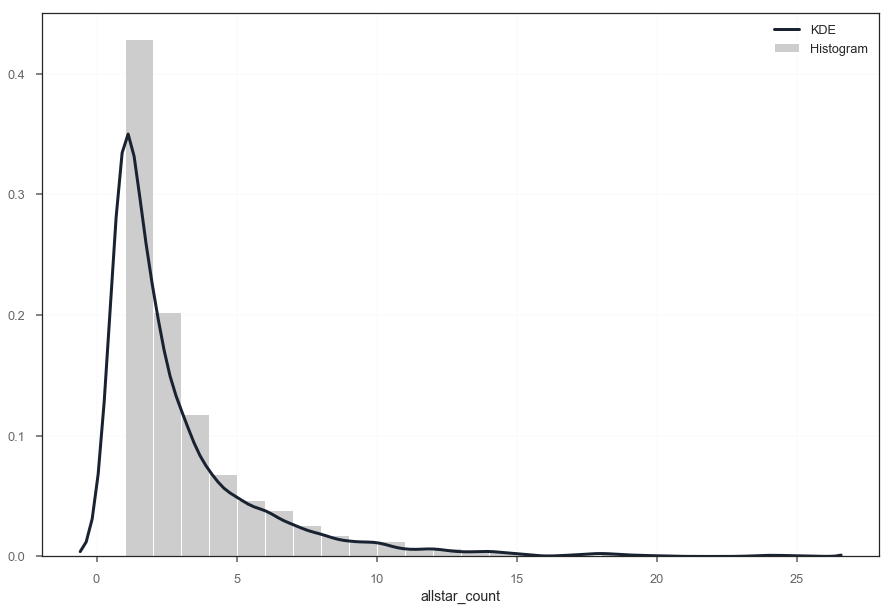

In [7]:
fig_size = (15, 10)
figures.common_set_up(fig_size)
color_set = ['#192231','#3C3C3C','#CDCDCD', '#494E6B']
x = df['allstar_count'].dropna()

x_max = x.max()
x_min = x.min()
bin_n = int(x_max)-int(x_min)

ax = sns.distplot(x, bins=bin_n, rug=False,
                      hist_kws={"histtype": "bar", "linewidth": 1, 'align': 'mid', 'log': False, 'edgecolor': 'white', "alpha": 1, "color": color_set[2], 'label': 'Histogram'},
                      kde_kws={"color": color_set[0], "lw": 3, "label": "KDE"},
                      rug_kws={"color": color_set[1], 'lw': 0.3, "alpha": 0.5, 'label': 'rug plot', 'height': 0.05})



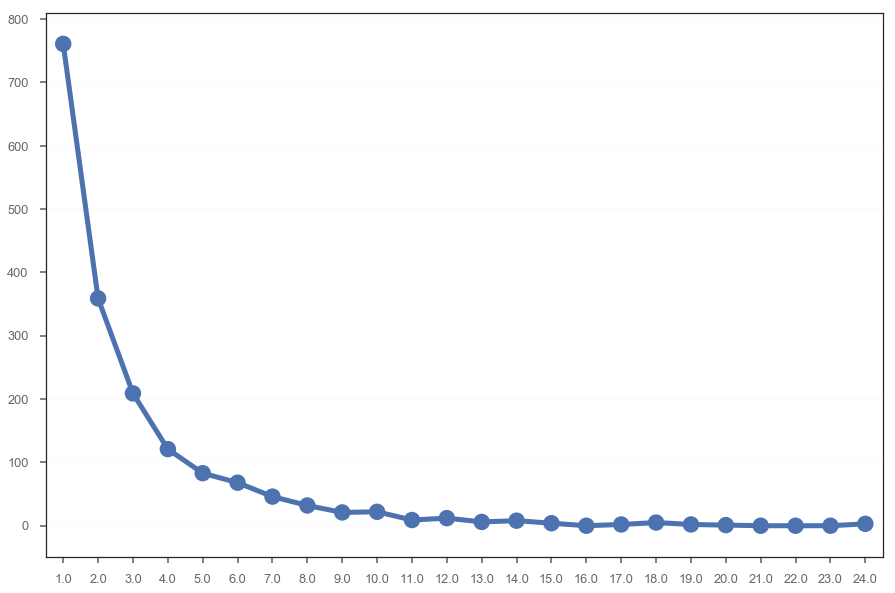

In [11]:
y,binEdges=np.histogram(x,bins=bin_n)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])-0.5

sns.pointplot(bincenters, y)